# <center>Определение параметров адаптивных моделей</center> 

Параметры адаптивных моделей ($\alpha, \beta, \gamma, \phi$) выбираются таким образом, чтобы ошибка при аппроксимации полученной моделью была как можно меньше, т.е. необходимо решить задачу оптимизации.

## Оптимизация в <a href='https://www.scipy.org/'>SciPy</a>

Решать задачи оптимизации позволяет библиотека SciPy. Алгоритмы оптимизации лежат в модуле `scipy.optimize`. Найдем минимум следующей функции:

$$f(x)=x^2+2x^4-3x.$$

In [1]:
def fun(x):
    return x**2 + 2*x**4 - 3*x

Воспользуемся функцией `minimize` из указанного модуля. В данной функции реализованы численные методы решения задач оптимизации. В качестве первого аргумента `minimize` принимает функцию, минимум которой необходимо найти, а в качестве второго аргумента &ndash; начальное значение переменных.

In [2]:
from scipy.optimize import minimize

In [3]:
result = minimize(fun, 0)
result

      fun: -1.1810421376911344
 hess_inv: array([[0.09247045]])
      jac: array([-3.03983688e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 4
     njev: 7
   status: 0
  success: True
        x: array([0.60670554])

Значение целевой функции и оптимальное значение $x$:

In [4]:
result.fun, result.x

(-1.1810421376911344, array([0.60670554]))

Функция нескольких переменных может быть передана в `minimize` двумя способами:

In [5]:
def fun1(x1, x2):
    return x1**2 + 2*x1*x2 + x2**2

In [6]:
minimize(lambda x: fun1(x[0], x[1]), (2,2))

      fun: 2.8552400645473715e-15
 hess_inv: array([[ 0.62499999, -0.375     ],
       [-0.375     ,  0.62500001]])
      jac: array([-9.19677317e-08, -9.19677317e-08])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([ 5.67418834e-08, -1.10176330e-07])

In [7]:
fun2 = lambda x: x[0]**2 + 2*x[0]*x[1] + x[1]**2

In [8]:
minimize(fun2, (2,2))

      fun: 2.8552400645473715e-15
 hess_inv: array([[ 0.62499999, -0.375     ],
       [-0.375     ,  0.62500001]])
      jac: array([-9.19677317e-08, -9.19677317e-08])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([ 5.67418834e-08, -1.10176330e-07])

Можно указать ограничения на значения переменных с помощью опций `constraints` и `bounds`.

In [9]:
fun3 = lambda x: x[0] + x[1]

In [10]:
# x1 >= 0, x2 >= 0
bnds = ((0,None),(0,None))

# 3*x1 + 2*x2 >= 7
# x1 + 2*x2 >= 6
cons = ({'type': 'ineq', 'fun': lambda x: 3*x[0] + 2*x[1] - 7},
        {'type': 'ineq', 'fun': lambda x: x[0] + 2*x[1] - 6})

In [11]:
minimize(fun3, (2,2), bounds=bnds, constraints=cons)

     fun: 3.2500000000000004
     jac: array([1., 1.])
 message: 'Optimization terminated successfully.'
    nfev: 12
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([0.5 , 2.75])

<div class="alert alert-info">

<h3> Задание 1</h3>
<p></p>
<ul>1. Определите функцию, которая принимает на вход временной ряд и параметры модели Хольта для линейного тренда (см. задание 2 с предыдущего занятия). Данная функция должна возвращать среднеквадратичную ошибку модели.</ul>
<ul>2. Определите оптимальные параметры $\alpha$ и $\beta$ для ряда объемов пассажирских авиаперевозок в Австралии (файл ausair.csv). Постройте модель Хольта с найденными параметрами и получите прогноз на 10 лет вперед.</ul>
<p></p>
  
</div>

<div class="alert alert-warning">

<p></p>
Если на предыдущем занятии не удалось оформить модель Хольта в виде функции:    
    
<ul>1. Определите функцию, которая принимает на вход два одномерных массива и возвращает среднеквадратичную ошибку.</ul>
    
<ul>2. Определите сетку возможных параметров $\alpha$ и $\beta$ с помощью np.linspace.</ul>
    
<ul>3. Путем перебора различных комбинаций параметров $\alpha$ и $\beta$ выберите оптимальные с т.з. значения среднеквадратичной ошибки параметры. </ul>
<p></p>
  
</div>

In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
ausair = pd.read_csv('data/ausair.csv')

In [14]:
def holt(series, h, alpha=0.8, beta=0.3, phi=1):
    """
    Holt's model.
    
    Parameters
    ----------
    series : np.array or list
        Initial time series values.
        
    h : int
        Forecast horizon.
    
    alpha : float
        Level parameter.
    
    beta : float
        Trend parameter.
    
    phi : float
        For damped trend.
        
    Returns
    -------
    forecast : list
        Approximation and forecast values.
    """
    forecast = [series[0]]
    level = series[0]
    trend = series[1] - series[0]
    for i in range(1, len(series) + h):
        if i < len(series):
            value = series[i]
        else:
            value = forecast[-1]
        prev_level, level = level, alpha*value + (1 - alpha)*(level + phi*trend)
        trend = beta*(level - prev_level) + (1 - beta)*phi*trend
        forecast.append(level + phi*trend)
    return forecast

In [15]:
series = ausair['Passengers'].values

In [16]:
exponential_smoothing = holt(series, 10, alpha=0.8, beta=0, phi=0)

In [17]:
holt_forecast = holt(series, 10, alpha=0.59, beta=0.43, phi=1)

In [18]:
damped_trend_forecast = holt(series, 10, alpha=0.39, beta=0.1, phi=0.9)

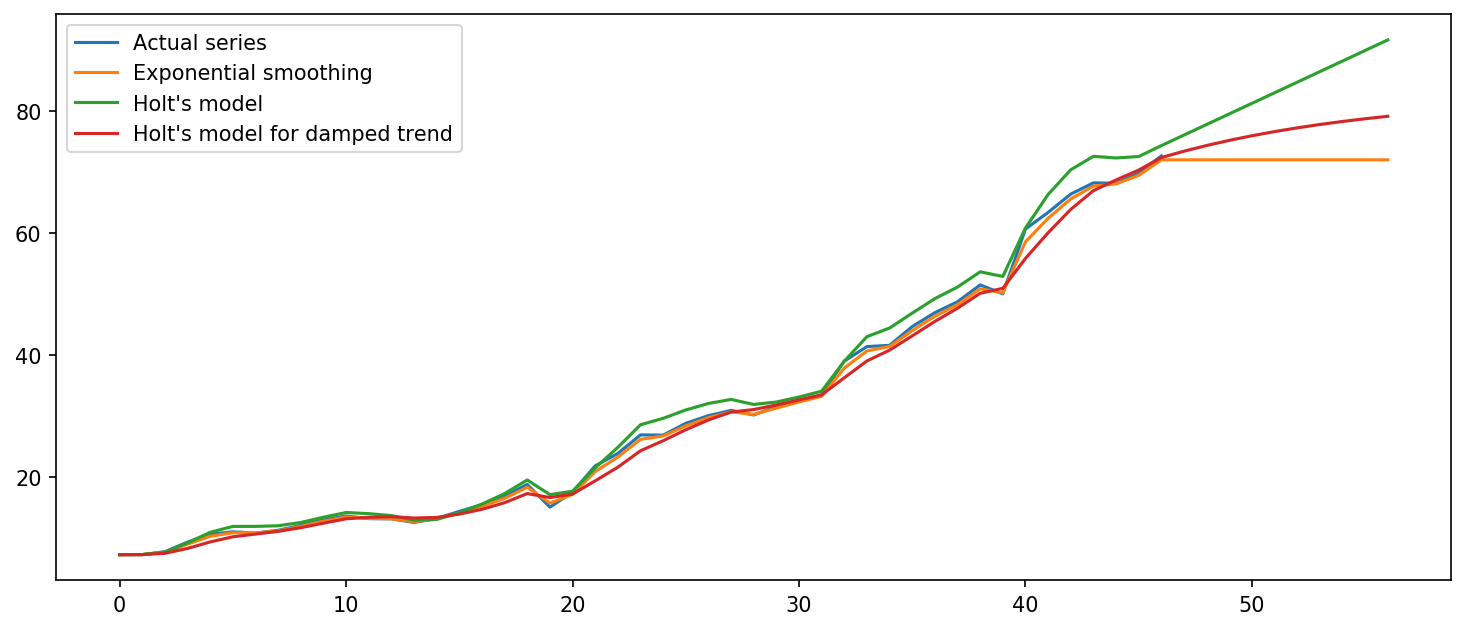

In [19]:
plt.figure(figsize=(12,5), dpi=150)
plt.plot(series)
plt.plot(exponential_smoothing)
plt.plot(holt_forecast)
plt.plot(damped_trend_forecast)
plt.legend(["Actual series", "Exponential smoothing", 
            "Holt's model", "Holt's model for damped trend"])
plt.show()

In [20]:
def model_error(series, alpha, beta, phi):
    approximation = holt(series, 0, alpha, beta, phi)
    return np.mean((series[1:] - approximation[:-1])**2)

In [21]:
bnds = ((0, 1), (0, 1))

res1 = minimize(lambda x: model_error(series[20:], x[0], x[1], 1), (0, 0), bounds=bnds)

alpha, beta = res1.x
print('MSE = {:.2f}'.format(res1.fun))
print('alpha = {:.2f},'.format(alpha), 'beta = {:.2f}'.format(beta))

MSE = 7.03
alpha = 0.86, beta = 0.27


In [22]:
holt_forecast = holt(series[20:], 10, alpha=alpha, beta=beta, phi=1)

<div class="alert alert-info">

<h3> Задание 2</h3>
<p></p>
<ul>1. Для модели Хольта с аддитивным затухающим трендом (задание 3 с предыдущего занятия) проделайте те же шаги, что и в задании 1. В данном случае кроме параметров $\alpha$ и $\beta$ необходимо также определить оптимальный параметр $\phi$.</ul>
<ul>2. Сравните на графике аппроксимации и прогнозы с помощью модели для линейного тренда и модели с аддитивным затухающим трендом.</ul>
<p></p>
  
</div>

In [23]:
bnds = ((0, 1), (0, 1), (0, 1))

res2 = minimize(lambda x: model_error(series, x[0], x[1], x[2]), (0, 0, 0), bounds=bnds)

alpha, beta, phi = res2.x
print('MSE = {:.2f}'.format(res2.fun))
print('alpha = {:.2f},'.format(alpha), 
      'beta = {:.2f},'.format(beta), 
      'phi = {:.2f}'.format(phi))

MSE = 4.08
alpha = 0.85, beta = 0.13, phi = 1.00


In [24]:
bnds = ((0, 1), (0, 1), (0, 1))

res3 = minimize(lambda x: model_error(series[20:], x[0], x[1], x[2]), (0, 0, 0), bounds=bnds)

alpha, beta, phi = res3.x
print('MSE = {:.2f}'.format(res3.fun))
print('alpha = {:.2f},'.format(alpha), 
      'beta = {:.2f},'.format(beta), 
      'phi = {:.2f}'.format(phi))

MSE = 6.57
alpha = 0.76, beta = 0.36, phi = 0.89


In [25]:
damped_trend_forecast = holt(series[20:], 10, alpha=alpha, beta=beta, phi=phi)

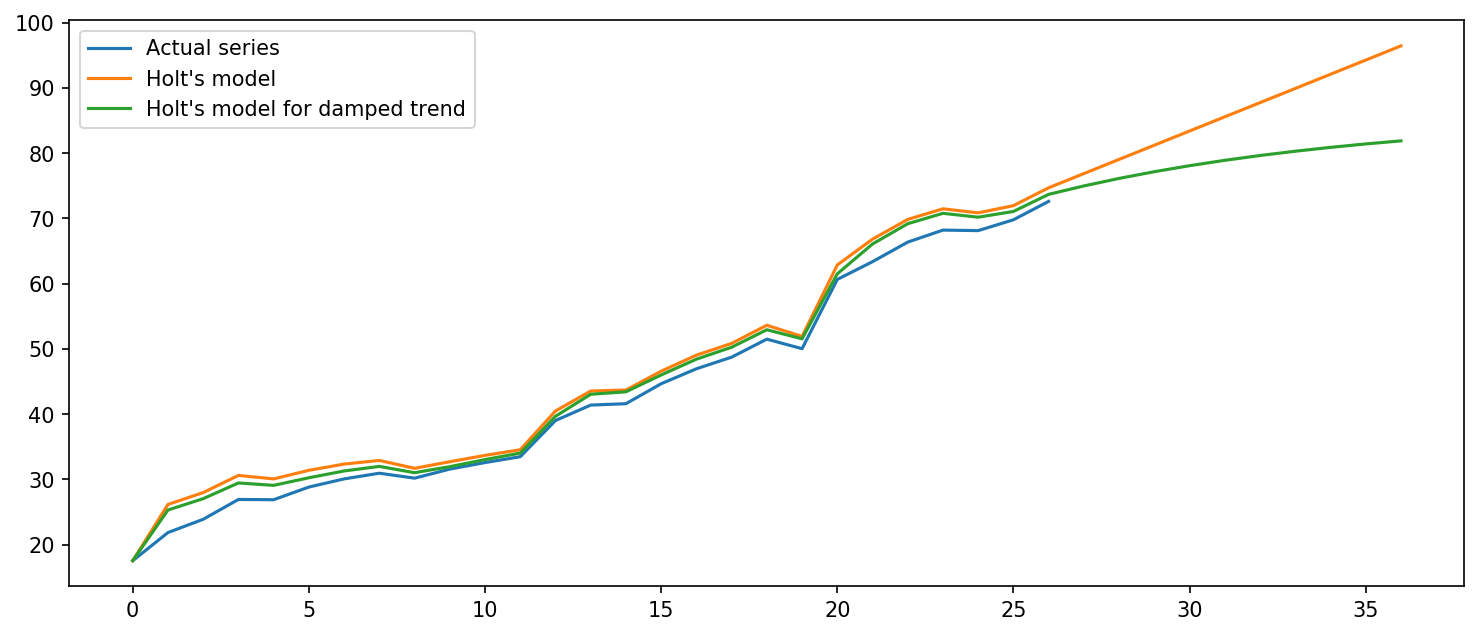

In [26]:
plt.figure(figsize=(12,5), dpi=150)
plt.plot(series[20:])
plt.plot(holt_forecast)
plt.plot(damped_trend_forecast)
plt.legend(["Actual series", "Holt's model", "Holt's model for damped trend"])
plt.show()